In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickleslicer

plt.rcdefaults()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

Load the data file containing the sequences, compiler results, and calculated data.

> _Note: 8-qubit data is omitted from this repository due to file size limitations._

In [2]:
class PlotData:
    def __init__(self):
        self.parametric_xdata = [0.0]
        self.parametric_ydata = [0.0]
        self.wall_xdata = [0.0]
        self.wall_ydata = [0.0]

ideal_sequences = {}
trotter_sequences = {}
qdrift_sequences = {}
stoq_compiler_results = {}
trotter_plot_data = {}
qdrift_plot_data = {}
stoq_plot_data = {}
for n in [2, 3, 5]:
    load_data = pickleslicer.load(f'data/hamiltonian_compilation_{n}q.pickle')
    ideal_sequences[n] = load_data["ideal_sequence"]
    trotter_sequences[n] = load_data["trotter_sequence"]
    qdrift_sequences[n] = load_data["qdrift_sequence"]
    stoq_compiler_results[n] = load_data["qmcmc_compiler_results"]
    trotter_plot_data[n] = load_data["trotter_plot_data"]
    qdrift_plot_data[n] = load_data["qdrift_plot_data"]
    stoq_plot_data[n] = load_data["qmcmc_plot_data"]

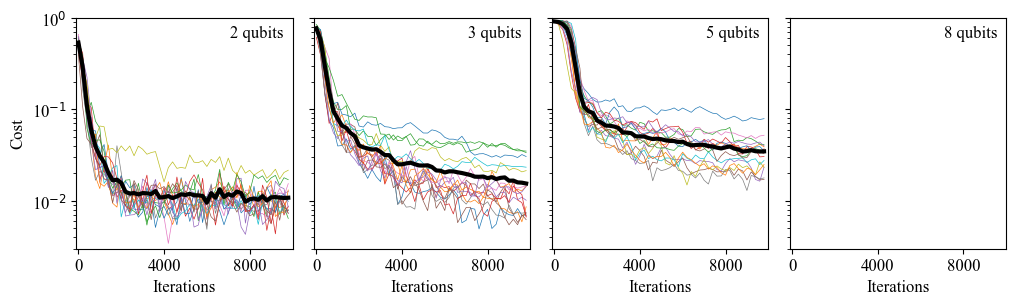

In [3]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=((12,3)), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1)

bucket_size = 200

for n, ax in { 2: ax0, 3: ax1, 5: ax2, 8: ax3 }.items():
    all_costs = []
    if n in stoq_compiler_results:
        for result in stoq_compiler_results[n]:
            x = np.arange(0, len(result.cost_by_step), bucket_size)
            costs = [np.mean(result.cost_by_step[i:i+bucket_size-1]) for i in x]
            ax.plot(x, costs, linestyle='-', linewidth=0.5)
            all_costs.append(costs)

        costs_avg = np.mean(all_costs, 0)

        ax.plot(x, costs_avg, color='k', linewidth=3)
    
    ax.set_xlim(-100, 10000)
    ax.set_ylim(0.003, 1.0)
    ax.set_yscale('log')
    ax.set_xticks(ticks=[0, 4000, 8000])
    ax.set_xticklabels(labels=['0', '4000', '8000'], fontsize=12)
    ax.set_yticks(ticks=[1e-2, 1e-1, 1e0])
    ax.set_yticklabels(labels=[r'10$^{-2}$', r'10$^{-1}$', r'10$^{0}$'], fontsize=12)
    
    ax.text(x=9600, y=0.6, s=f'{n} qubits', fontsize=12, horizontalalignment='right')
    ax.set_xlabel(r'Iterations', fontsize=12, horizontalalignment='center')

ax0.set_ylabel('Cost', fontsize=12)

fig.savefig("fig10.pdf", bbox_inches='tight')

plt.show()